In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random

# **Generate Topics**

In [2]:
from model.generate_topic import Mini_Bert, find_topic, llm_summary_cluster
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

/Users/peetiphartsuebpeng/Documents/11-PROJECT-WizMap/generate-wizmap-dev/model/generate_vector/node.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## **Structure of Data**

In [3]:
df = pd.read_parquet('./output_test/data.parquet')
df

,data_process,vector,x,y,data_display
0,title: Quantitative HPLC Determination and Sta...,"[-0.0074133547, -0.017918514, -0.08736931, -0....",-2.303174,8.624246,X: -2.3032 Y: 8.6242 Content: title: Quantitat...
1,title: Insecticidal activity of Stemona collin...,"[0.0048623416, -0.044462435, -0.1135353, -0.04...",-2.333353,9.045902,X: -2.3334 Y: 9.0459 Content: title: Insectici...
2,title: Oral toxicity of various Stemona collin...,"[0.053052347, -0.042213105, -0.082500555, -0.0...",-2.417654,8.920828,X: -2.4177 Y: 8.9208 Content: title: Oral toxi...
3,title: Optimized extraction for high yield of ...,"[0.00866904, 0.013025655, -0.08530998, -0.0659...",-2.425498,8.621630,X: -2.4255 Y: 8.6216 Content: title: Optimized...
4,title: Acetylcholinesterase inhibitory activit...,"[0.01852814, -0.03028386, -0.07568237, -0.0225...",-2.602903,8.542785,X: -2.6029 Y: 8.5428 Content: title: Acetylcho...
...,...,...,...,...,...
1951,title: Effects of Onion (Allium cepa L.) and G...,"[-0.03210118, -0.026279455, -0.050988115, 0.03...",5.431913,7.503321,X: 5.4319 Y: 7.5033 Content: title: Effects of...
1952,title: Methods of Isolation of Active Substanc...,"[-0.04116749, -0.033044282, -0.09556768, 0.057...",5.586211,7.031571,X: 5.5862 Y: 7.0316 Content: title: Methods of...
1953,title: Garlic (Allium sativum L.): a potential...,"[-0.061984845, 0.005201916, -0.10571754, 0.041...",5.333734,6.810878,X: 5.3337 Y: 6.8109 Content: title: Garlic (Al...
1954,title: Character association and path analysis...,"[0.002141517, -0.003871272, -0.04897455, 0.057...",6.493972,7.872734,X: 6.494 Y: 7.8727 Content: title: Character a...


In [4]:
docs = df['data_process'].tolist()

In [5]:
example_input = random.sample(docs, 10)

In [6]:
example_input

['title: Antioxidant Activities and Antioxidative Components in Extracts of Alpinia galanga (L.) Sw pub_year: 2009 keyword: Zingiber_cassumunar abstract: Galangal extracted using 50% ethanol in water was studied for its antioxidant activity and composition in comparison with two other samples based on a water extract and the essential oil. The antioxidant activities were determined using the 2,2-diphenyl-1-picrylhydrazyl (DPPH) and oxygen radical absorbance capacity (ORAC) methods. The ethanolic extract showed the highest DPPH free radical scavenging ability as well as the highest ORAC value when compared to the water extract and the essential oil. The IC 50 values of the galangal ethanolic extract (10.66 mg/ml), water extract (55.48 mg/ml) and essential oil (455.43 mg/ml) were higher than those of α-tocopherol (1.45 mg/ml) and butylated hydroxyanisole (BHA; 0.41 mg/ml). The results indicated that the antioxidant activities of galangal extracts were lower than that of BHA, the commerci

## **find_topic[I/O]**

In [8]:
generator_topic = find_topic(n_topic=20, cv=CountVectorizer(stop_words="english", ngram_range=(1, 1)))

In [9]:
generator_topic.input(' '.join(example_input))

In [10]:
topwords = generator_topic.run()
topwords = dict(topwords[0])
topwords

{'ad': 0.1094,
 'galanga': 0.1094,
 'keyword': 0.1367,
 'garlic': 0.1094,
 'inflammatory': 0.1367,
 'kaempferia': 0.1367,
 '1β': 0.123,
 'results': 0.123,
 'mm': 0.2187,
 'curcumin': 0.123,
 'concentration': 0.1914,
 'abstract': 0.1367,
 'extract': 0.2598,
 'title': 0.1367,
 'compounds': 0.1094,
 'study': 0.123,
 'pub_year': 0.1367,
 'il': 0.123,
 'rhizome': 0.123,
 'activity': 0.123}

In [11]:
topwords = dict(sorted(topwords.items(), key=lambda x: x[1], reverse=True))
topwords

{'extract': 0.2598,
 'mm': 0.2187,
 'concentration': 0.1914,
 'keyword': 0.1367,
 'inflammatory': 0.1367,
 'kaempferia': 0.1367,
 'abstract': 0.1367,
 'title': 0.1367,
 'pub_year': 0.1367,
 '1β': 0.123,
 'results': 0.123,
 'curcumin': 0.123,
 'study': 0.123,
 'il': 0.123,
 'rhizome': 0.123,
 'activity': 0.123,
 'ad': 0.1094,
 'galanga': 0.1094,
 'garlic': 0.1094,
 'compounds': 0.1094}

Text(0.5, 1.0, 'Top words')

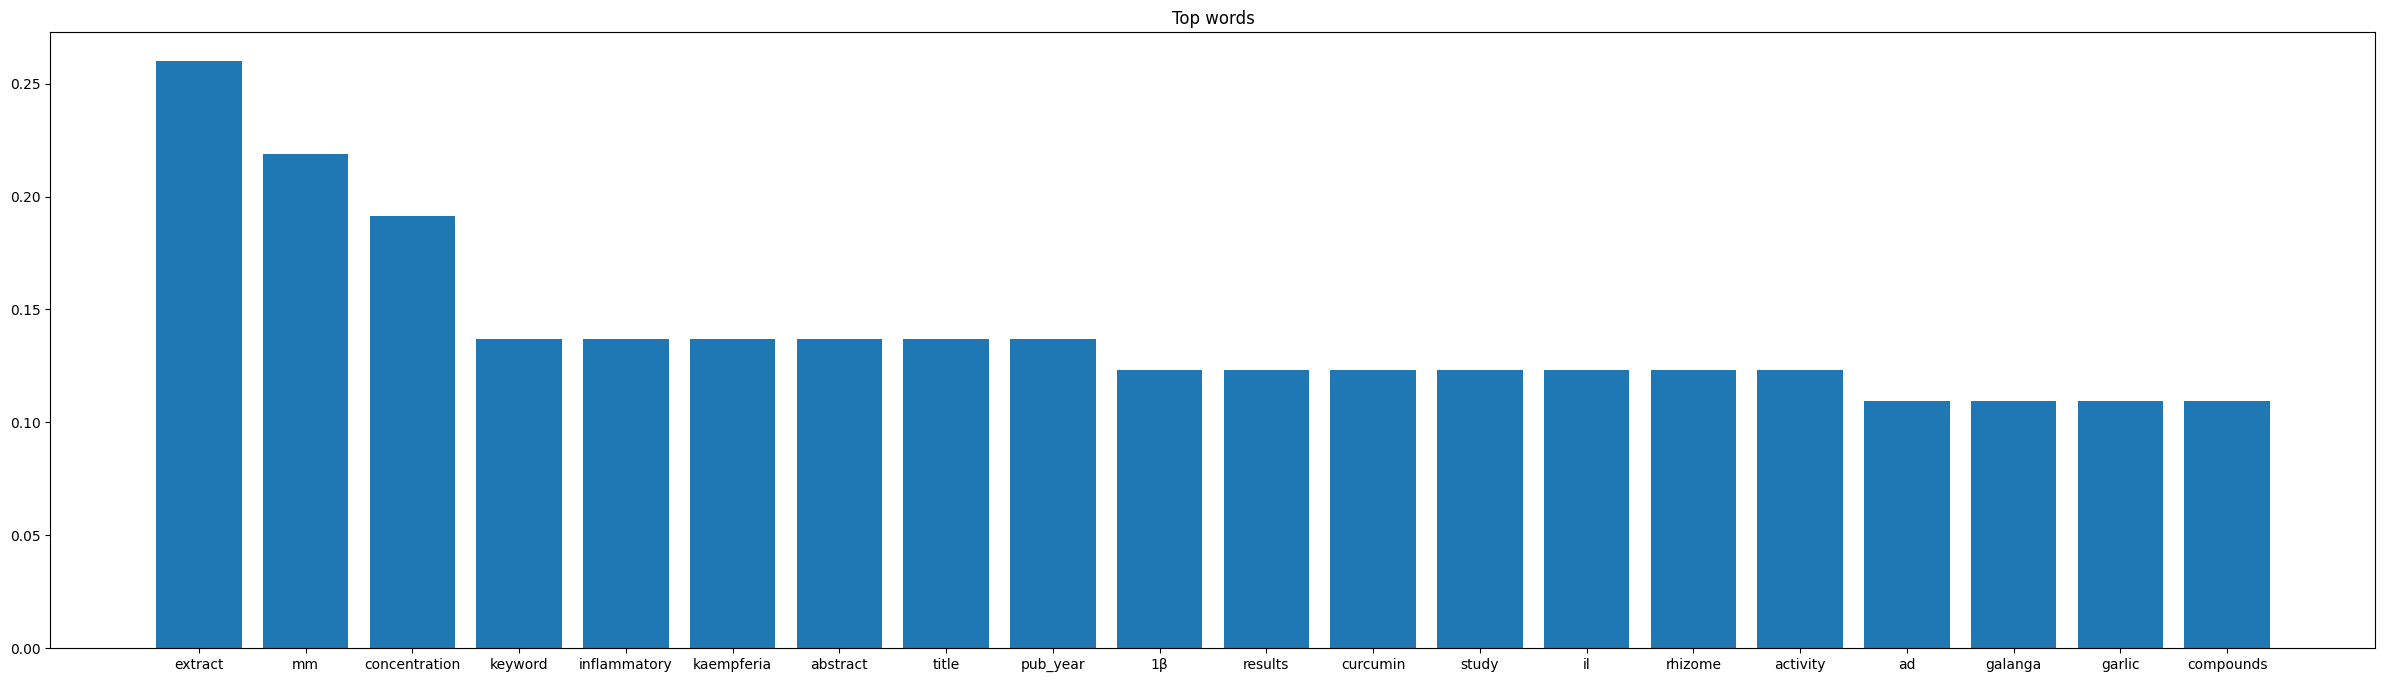

In [13]:
plt.figure(figsize=(30,8))
plt.bar(list(topwords.keys()), list(topwords.values()))
plt.title(label='Top words')

# **llm generate summary**

### **GPT**

In [15]:
gpt_generator = llm_summary_cluster(gpt_api=api_key, verbose=True)

In [16]:
text = """ [hello world! This is example text] """
print(gpt_generator.generate_prompt(text))


    please use the input to create and summarize short content in 'summary' and create short topic or header in 'header' and response in json format.
    # input
     [hello world! This is example text] 
    
    # example json output
{'header':'header', 'summary': 'summary'}


In [17]:
gpt_res = gpt_generator.response(example_input)

In [18]:
eval(gpt_res)

{'header': 'Antimicrobial Activity Test of Mangosteen Leaves Ethanol Extract ( Garcinia mangostana Linn ) Against Pseudomonas aeruginosa Bacteria',
 'summary': 'The research aimed to examine the antibacterial activity of mangosteen leaves ethanol extract against Pseudomonas aeruginosa bacteria. Results showed that the extract could inhibit bacteria from a concentration of 10% with a minimum inhibitory concentration of 13.20 mm.'}

### **Gemini**

In [20]:
gemini_generator = llm_summary_cluster(gemini_api=gemini_key, verbose=True)

In [21]:
gemini_res = gemini_generator.response(example_input)

In [22]:
eval(gemini_res)

{'header': 'Antibacterial Activity of Mangosteen Leaves Ethanol Extract ( Garcinia mangostana Linn ) Against Pseudomonas aeruginosa Bacteria',
 'summary': 'This study investigates the antibacterial activity of mangosteen leaves ethanol extract against Ps. aeruginosa bacteria. The results showed that the ethanol extract of mangosteen leaves could inhibit bacteria from a concentration of 10% with an average inhibitory diameter of 13.20 mm, 20% is 14.00 mm, 30% is 14.65 mm, 40% is 15.85 mm, 50% is 16.05 mm, 60% is 16.90 mm, 70% is 17.55 mm, 80% is 18.75 mm, 90% is 19.25 mm and 100% equal to 24.80 mm. The minimum inhibitory concentration was 10% with a diameter inhibitor zone of 13.20 mm.'}

# **Mini_Bert**

In [7]:
df

,data_process,vector,x,y,data_display
0,title: Quantitative HPLC Determination and Sta...,"[-0.0074133547, -0.017918514, -0.08736931, -0....",-2.303174,8.624246,X: -2.3032 Y: 8.6242 Content: title: Quantitat...
1,title: Insecticidal activity of Stemona collin...,"[0.0048623416, -0.044462435, -0.1135353, -0.04...",-2.333353,9.045902,X: -2.3334 Y: 9.0459 Content: title: Insectici...
2,title: Oral toxicity of various Stemona collin...,"[0.053052347, -0.042213105, -0.082500555, -0.0...",-2.417654,8.920828,X: -2.4177 Y: 8.9208 Content: title: Oral toxi...
3,title: Optimized extraction for high yield of ...,"[0.00866904, 0.013025655, -0.08530998, -0.0659...",-2.425498,8.621630,X: -2.4255 Y: 8.6216 Content: title: Optimized...
4,title: Acetylcholinesterase inhibitory activit...,"[0.01852814, -0.03028386, -0.07568237, -0.0225...",-2.602903,8.542785,X: -2.6029 Y: 8.5428 Content: title: Acetylcho...
...,...,...,...,...,...
1951,title: Effects of Onion (Allium cepa L.) and G...,"[-0.03210118, -0.026279455, -0.050988115, 0.03...",5.431913,7.503321,X: 5.4319 Y: 7.5033 Content: title: Effects of...
1952,title: Methods of Isolation of Active Substanc...,"[-0.04116749, -0.033044282, -0.09556768, 0.057...",5.586211,7.031571,X: 5.5862 Y: 7.0316 Content: title: Methods of...
1953,title: Garlic (Allium sativum L.): a potential...,"[-0.061984845, 0.005201916, -0.10571754, 0.041...",5.333734,6.810878,X: 5.3337 Y: 6.8109 Content: title: Garlic (Al...
1954,title: Character association and path analysis...,"[0.002141517, -0.003871272, -0.04897455, 0.057...",6.493972,7.872734,X: 6.494 Y: 7.8727 Content: title: Character a...


In [9]:
generator = Mini_Bert(cv=CountVectorizer(stop_words="english", ngram_range=(1, 1)), 
  cluster=KMeans(n_clusters=6), 
  gemini_token=gemini_key, 
  n_topic=10, 
  batch_size=126, 
  n_sample_summary=15, 
  verbose=True)

In [10]:
generator.input(df)

In [11]:
rs, model_log, data = generator.run()

Cluster :   0%|          | 0/6 [00:00<?, ?it/s]

In [12]:
rs

,cluster,topword,summary
0,3,"[[(compounds, 0.1514), (kp, 0.1721), (kaempfer...",{'header': 'Two new monoterpene esters from Il...
1,1,"[[(study, 0.1261), (analysis, 0.1303), (plant,...","{ ""header"": ""Predictive Analysis of Quality M..."
2,5,"[[(title, 0.1664), (abstract, 0.1686), (oil, 0...",{'header': 'Bioadhesive dermal patch as promis...
3,2,"[[(title, 0.1619), (pub_year, 0.1619), (abstra...",{'header': 'Antimicrobial Effects of Garcinia ...
4,4,"[[(extract, 0.1395), (pub_year, 0.1501), (keyw...","{'header': 'Curcuma longa, Linn – A Review', '..."
5,0,"[[(extract, 0.1058), (keyword, 0.129), (pub_ye...",{'header': 'Garlic (Allium sativum): A Compreh...


In [16]:
rs['summary'] = rs['summary'].apply(eval)

In [31]:
rs[rs['cluster']==2]['summary'].values[0]

{'header': 'Antimicrobial Effects of Garcinia Mangostana on Cariogenic Microorganisms',
 'summary': 'Introduction: Garcinia mangostana commonly called as Mangosteen fruit has been used as an antibacterial agent since age old times. The mangosteen pericarp has proven to have antibacterial effect, but the effect of the same on cariogenic organisms has not been explored. The present study was an attempt to gain a better understanding of the antibacterial effect of mangosteen pericarp on the cariogenic bacteria, to unravel the therapeutic potential for the same.\n\nAim: The aim of the study was to assess the antibacterial efficacy of the crude chloroform extract of mangosteen pericarp against cariogenic bacteria.\n\nMaterials and methods: The study was done under laboratory settings using an in vitro design. The microorganisms namely Streptococcus mutans, Streptococcus sanguis, Streptococcus salivarius, Streptococcus oralis and Lactobacillus acidophilus were procured from American Type Cel

In [28]:
for cluster in rs.cluster.unique() : 
    tmp_rs = rs[rs['cluster']==cluster]
    tmp_dict = tmp_rs['summary'].values[0]
    print(f'header: {tmp_dict.get('header')} \nsummary: {tmp_dict.get('summary')}\n')
    print(f'#####'*32,'\n')

header: Two new monoterpene esters from Illigera paviflora Dunn roots pub_year: 2022 
summary: Two new monoterpene esters, illigerates H and I (1 and 2), and six known compounds actinodaphine (3), bulbocupnine (4), stephanine (5), hypserpanine B (6), betulinic acid (7) and gallic acid (8) were obtained from the root of Illigera paviflora Dunn. Their structures were elucidated by spectroscopic analysis. Anti-inflammatory and antioxidant activities of some isolated compounds were assessed. Two monoterpenes 1 and 2 exhibited weak in vitro anti-inflammatory activity (IC50 64.5 ± 5.3 and 79.2 ± 7.5 μM) while compounds 3–6 showed inhibition of α-glucosidase with IC50 values ranged from 87.17 to 118.74 μM.

################################################################################################################################################################ 

header: Predictive Analysis of Quality Markers of Atractylodis Rhizoma Based on Fingerprint and Network Pharmacology 
summary: 

In [13]:
data

,data_process,vector,x,y,data_display,cluster
0,title: Quantitative HPLC Determination and Sta...,"[-0.0074133547, -0.017918514, -0.08736931, -0....",-2.303174,8.624246,X: -2.3032 Y: 8.6242 Content: title: Quantitat...,3
1,title: Insecticidal activity of Stemona collin...,"[0.0048623416, -0.044462435, -0.1135353, -0.04...",-2.333353,9.045902,X: -2.3334 Y: 9.0459 Content: title: Insectici...,3
2,title: Oral toxicity of various Stemona collin...,"[0.053052347, -0.042213105, -0.082500555, -0.0...",-2.417654,8.920828,X: -2.4177 Y: 8.9208 Content: title: Oral toxi...,3
3,title: Optimized extraction for high yield of ...,"[0.00866904, 0.013025655, -0.08530998, -0.0659...",-2.425498,8.621630,X: -2.4255 Y: 8.6216 Content: title: Optimized...,3
4,title: Acetylcholinesterase inhibitory activit...,"[0.01852814, -0.03028386, -0.07568237, -0.0225...",-2.602903,8.542785,X: -2.6029 Y: 8.5428 Content: title: Acetylcho...,3
...,...,...,...,...,...,...
1951,title: Effects of Onion (Allium cepa L.) and G...,"[-0.03210118, -0.026279455, -0.050988115, 0.03...",5.431913,7.503321,X: 5.4319 Y: 7.5033 Content: title: Effects of...,0
1952,title: Methods of Isolation of Active Substanc...,"[-0.04116749, -0.033044282, -0.09556768, 0.057...",5.586211,7.031571,X: 5.5862 Y: 7.0316 Content: title: Methods of...,0
1953,title: Garlic (Allium sativum L.): a potential...,"[-0.061984845, 0.005201916, -0.10571754, 0.041...",5.333734,6.810878,X: 5.3337 Y: 6.8109 Content: title: Garlic (Al...,0
1954,title: Character association and path analysis...,"[0.002141517, -0.003871272, -0.04897455, 0.057...",6.493972,7.872734,X: 6.494 Y: 7.8727 Content: title: Character a...,0


In [32]:
data.to_parquet('./output_test/data.parquet')

In [33]:
import pickle 
with open('./output_test/model_log.pkl', 'wb') as f : 
    pickle.dump(model_log, f)

In [34]:
model_log

{'clustering': KMeans(n_clusters=6),
 'cv': CountVectorizer(stop_words='english')}